<a href="https://colab.research.google.com/github/nameera-khan/Forage-virtual-experience-/blob/main/BA_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modelling of customer bookings

1. Section 1: Exploratory Data Analysis
2. Section 2: Outlier detection
3. Section 3: Hypothesis testing (Chi-squared test)
4. Section 4: Predictive analysis
5. Section 5: Feature importance


## Section 1: EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import bs4

In [3]:
#import dataset from drive on customer_bookings
path= '/content/drive/My Drive/customer_booking.csv'
df = pd.read_csv(path, encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
#checking the count for the booking_complete category
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [10]:
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [11]:
df.loc[(df['booking_complete']==1) & (df['sales_channel']=='Internet')]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,1,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,1,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,2,AKLKUL,Malaysia,0,0,0,8.83,1
124,1,Internet,RoundTrip,22,180,13,4,AKLKUL,Malaysia,1,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,3,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,2,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,2,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,3,PERPNH,Australia,0,0,0,5.62,1


In [12]:
df.loc[(df['booking_complete']==1) & (df['sales_channel']=='Mobile')]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
109,1,Mobile,RoundTrip,127,17,16,2,AKLKUL,Malaysia,1,0,1,8.83,1
258,1,Mobile,RoundTrip,22,82,10,5,AKLKUL,Malaysia,1,1,1,8.83,1
337,2,Mobile,RoundTrip,162,18,4,4,AKLKUL,Malaysia,0,0,0,8.83,1
460,1,Mobile,RoundTrip,121,19,10,2,AKLKUL,Malaysia,1,0,0,8.83,1
464,1,Mobile,RoundTrip,280,35,2,7,AKLKUL,Malaysia,1,1,1,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49819,1,Mobile,RoundTrip,31,6,14,5,PENTPE,Malaysia,1,0,1,4.67,1
49860,2,Mobile,RoundTrip,42,6,0,4,PENTPE,Malaysia,1,0,0,4.67,1
49867,2,Mobile,RoundTrip,75,6,12,5,PENTPE,Malaysia,1,0,1,4.67,1
49931,1,Mobile,RoundTrip,81,6,7,1,PENTPE,Malaysia,1,1,0,4.67,1


## Converting data types for categorical variables


In [13]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [14]:
columns = ['num_passengers','length_of_stay','flight_hour','flight_day','flight_duration','booking_complete']

df_2 = df.loc[:,['num_passengers','length_of_stay','flight_hour','flight_day','flight_duration','booking_complete']]

In [15]:
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete
0,2,19,7,6,5.52,0
1,1,20,3,6,5.52,0
2,2,22,17,3,5.52,0
3,1,31,4,6,5.52,0
4,2,22,15,3,5.52,0
...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0
49996,1,6,4,7,5.62,0
49997,1,6,22,6,5.62,0
49998,1,6,11,1,5.62,0


In [16]:
df_2['flight_day'] = df_2['flight_day'].astype('category')

In [17]:

subset = df_2.groupby(by =['flight_day','booking_complete'], axis=0,as_index=False)

In [18]:
subset

In [19]:
subset.length_of_stay.mean()

,flight_day,booking_complete,length_of_stay
0,1,0,22.851116
1,1,1,20.969269
2,2,0,24.057152
3,2,1,19.241807
4,3,0,23.791654
5,3,1,18.957668
6,4,0,24.086480
7,4,1,20.007130
8,5,0,23.842333
9,5,1,20.239064


In [20]:

subset_2 = df_2.groupby(by =['flight_day','num_passengers'], axis=0,as_index=False)
subset_2.length_of_stay.mean()

,flight_day,num_passengers,length_of_stay
0,1,1,25.721979
1,1,2,18.407250
2,1,3,16.676171
3,1,4,15.177936
4,1,5,15.050633
...,...,...,...
58,7,5,13.042553
59,7,6,7.189189
60,7,7,7.250000
61,7,8,12.714286


In [21]:
#counting the number of potential bookings/confirmed bookings for certain days
df_2.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [22]:
#to a/b test the statistics

df_2['TripType'] = df['trip_type']
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,TripType
0,2,19,7,6,5.52,0,RoundTrip
1,1,20,3,6,5.52,0,RoundTrip
2,2,22,17,3,5.52,0,RoundTrip
3,1,31,4,6,5.52,0,RoundTrip
4,2,22,15,3,5.52,0,RoundTrip
...,...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0,RoundTrip
49996,1,6,4,7,5.62,0,RoundTrip
49997,1,6,22,6,5.62,0,RoundTrip
49998,1,6,11,1,5.62,0,RoundTrip


In [23]:
df_2.groupby(['TripType','booking_complete']).count()

num_passengers  length_of_stay  flight_hour  \
TripType   booking_complete                                                
CircleTrip 0                            111             111          111   
           1                              5               5            5   
OneWay     0                            367             367          367   
           1                             20              20           20   
RoundTrip  0                          42044           42044        42044   
           1                           7453            7453         7453   

                             flight_day  flight_duration  
TripType   booking_complete                               
CircleTrip 0                        111              111  
           1                          5                5  
OneWay     0                        367              367  
           1                         20               20  
RoundTrip  0                      42044            42044  
           1                       7453             7453

<Axes: >

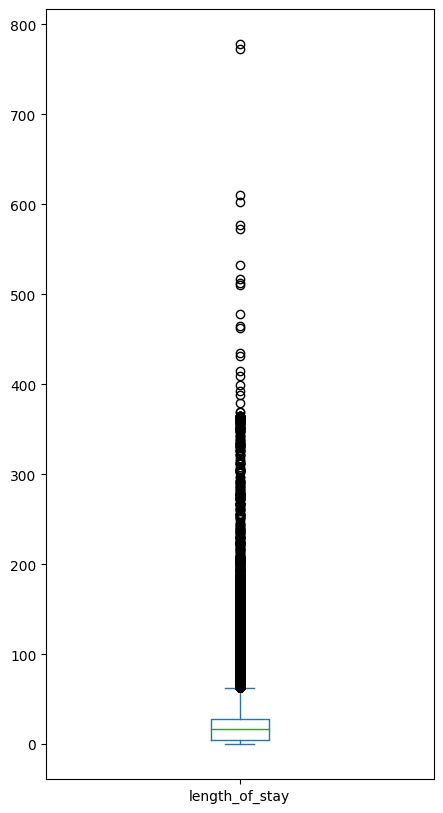

In [24]:
#analysing customer behaviour
#plotting the number of days in a trip
df_2.length_of_stay.plot.box(figsize=(5,10))

<Axes: xlabel='TripType', ylabel='length_of_stay'>

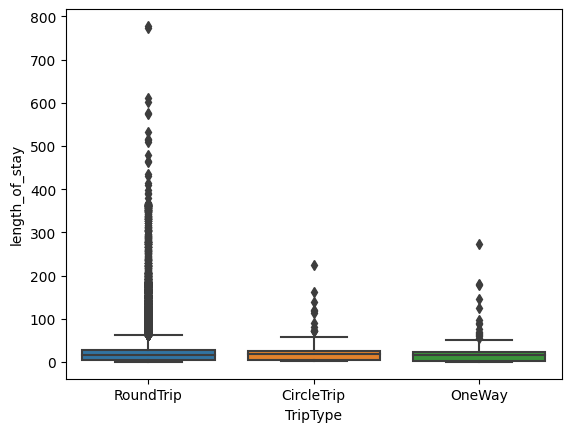

In [25]:
#to check the categories
import seaborn as sns
sns.boxplot(df_2, x='TripType', y = 'length_of_stay')

In [26]:
df_2.describe()

,num_passengers,length_of_stay,flight_hour,flight_duration,booking_complete
count,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000
mean,1.591240,23.04456,9.06634,7.277561,0.149560
std,1.020165,33.88767,5.41266,1.496863,0.356643
min,1.000000,0.00000,0.00000,4.670000,0.000000
25%,1.000000,5.00000,5.00000,5.620000,0.000000
50%,1.000000,17.00000,9.00000,7.570000,0.000000
75%,2.000000,28.00000,13.00000,8.830000,0.000000
max,9.000000,778.00000,23.00000,9.500000,1.000000


In [27]:
#to check if the customers with maximum number of days have completed booking
df_2[df_2['TripType']=='RoundTrip'].describe()

,num_passengers,length_of_stay,flight_hour,flight_duration,booking_complete
count,49497.00000,49497.000000,49497.000000,49497.000000,49497.000000
mean,1.59149,23.078611,9.064630,7.271030,0.150575
std,1.02026,33.945161,5.414077,1.497571,0.357638
min,1.00000,0.000000,0.000000,4.670000,0.000000
25%,1.00000,5.000000,5.000000,5.620000,0.000000
50%,1.00000,17.000000,9.000000,7.570000,0.000000
75%,2.00000,28.000000,13.000000,8.830000,0.000000
max,9.00000,778.000000,23.000000,9.500000,1.000000


In [28]:
import matplotlib.pyplot as plt


In [29]:
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,TripType
0,2,19,7,6,5.52,0,RoundTrip
1,1,20,3,6,5.52,0,RoundTrip
2,2,22,17,3,5.52,0,RoundTrip
3,1,31,4,6,5.52,0,RoundTrip
4,2,22,15,3,5.52,0,RoundTrip
...,...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0,RoundTrip
49996,1,6,4,7,5.62,0,RoundTrip
49997,1,6,22,6,5.62,0,RoundTrip
49998,1,6,11,1,5.62,0,RoundTrip


## Section 2: Customer behaviour trend

<ipython-input-30-8ded80236c6b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),


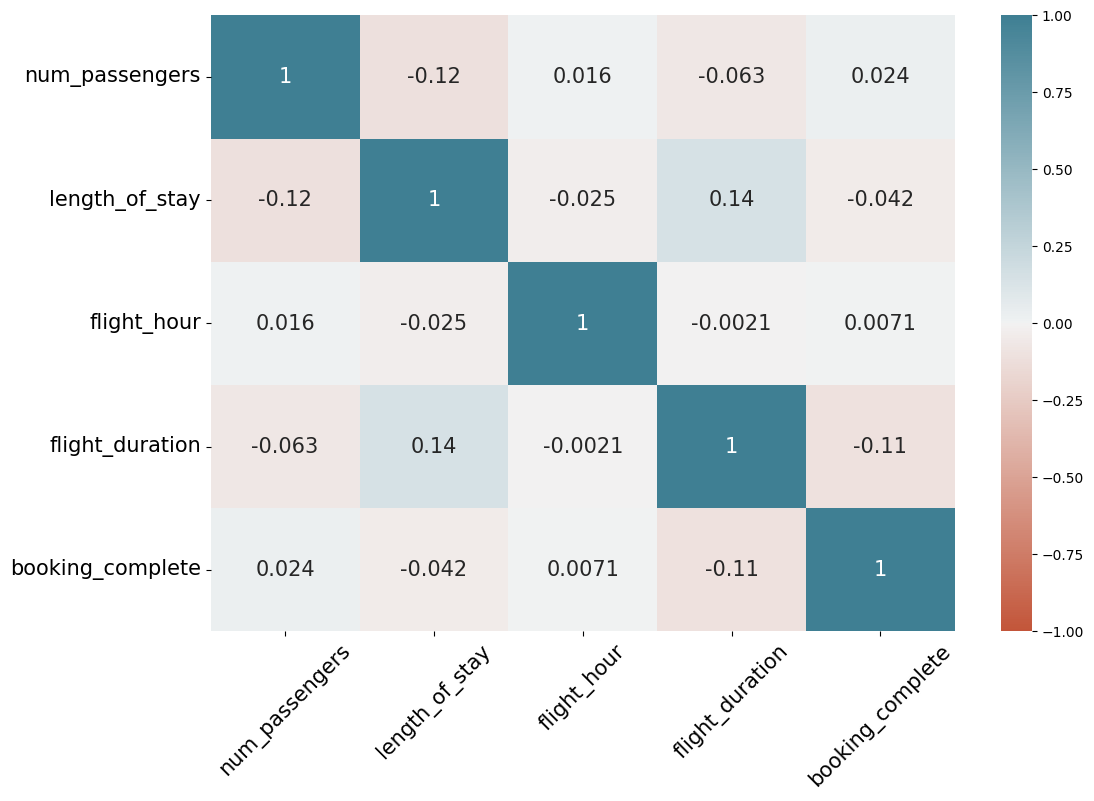

In [30]:
#checking correlation using heatmap
fig,ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(df_2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize =15)

<ipython-input-31-716c72761cde>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),


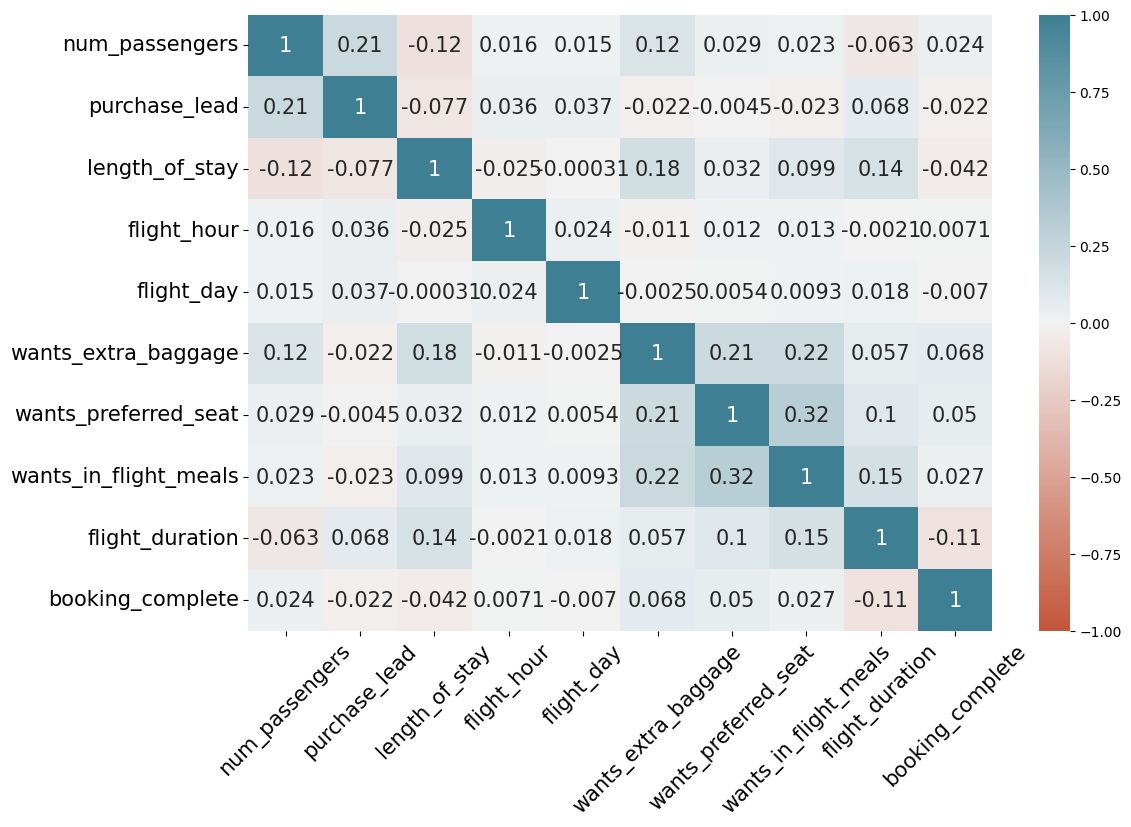

In [31]:
#checking correlation using heatmap
fig,ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize =15)

In [32]:
df['purchase_lead'].describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [33]:
def outlier_detection(data):

    '''A function to calculate the interquartile of the
    data given as a parameter and detect the outliers using the
    lower limit and upper limit'''

    Q1 = np.percentile(data, 25, interpolation = 'midpoint')
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    #print("The interquartile range is : ", IQR)

    lower_lim = Q1- 1.5*IQR
    upper_lim = Q3+ 1.5*IQR
    #print("lower limit for the age data: ", lower_lim)
    #print("upper limit for the age data: ", upper_lim)

    #a list to append the outliers in the data
    outlier = []
    for x in data:
        if((x > upper_lim) or (x < lower_lim)):
            outlier.append(x)

    return outlier

In [34]:
len(outlier_detection(df['purchase_lead']))


<ipython-input-33-56de8f675516>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data, 50, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.perce

3456

In [35]:
len(outlier_detection(df['length_of_stay']))


<ipython-input-33-56de8f675516>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data, 50, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.perce

3807

the number of total outliers in purchase_lead are 3456 and the outliers in length of stay is 3807. the total number of customer bookings are 50,000.

Text(0, 0.5, 'Number of bookings')

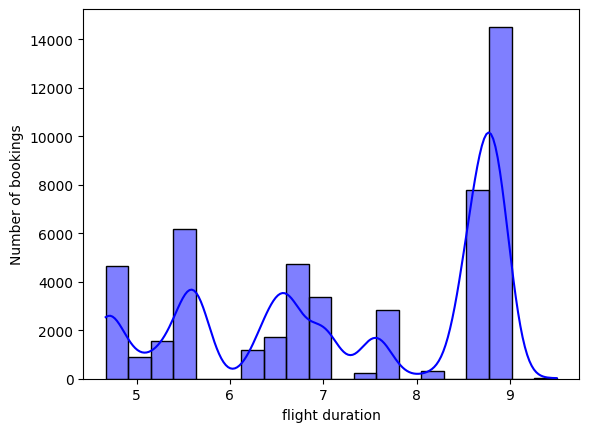

In [36]:
#plotting the distribution of length_of_stay to flight_duration
#fig, (a1, a2) = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df['flight_duration'],bins=20,kde=True,color='blue')
plt.xlabel('flight duration')
plt.ylabel('Number of bookings')

In [37]:
duration = pd.crosstab(columns = df.booking_complete, index = df.flight_duration)

In [38]:
duration['Total'] = duration.sum(axis=1)
#calculating the proportion of bookings for each duration of flights
duration.loc[:,'Proportion'] = duration.apply(lambda r: 100 * r[1] / r.Total, axis=1)

In [39]:
duration

booking_complete,0,1,Total,Proportion
flight_duration,,,,
4.67,2068,675,2743,24.608093
4.72,381,121,502,24.103586
4.75,836,419,1255,33.386454
4.83,137,19,156,12.179487
5.00,183,58,241,24.066390
5.07,391,121,512,23.632812
5.13,97,28,125,22.400000
5.33,1168,386,1554,24.839125
5.52,615,52,667,7.796102


In [40]:
duration.describe()

booking_complete,0,1,Total,Proportion
count,21.000000,21.000000,21.000000,21.000000
mean,2024.857143,356.095238,2380.952381,17.753659
std,3024.457774,402.280114,3393.533387,7.766571
min,32.000000,1.000000,37.000000,0.321543
25%,310.000000,52.000000,311.000000,12.179487
50%,836.000000,195.000000,1190.000000,17.636684
75%,2335.000000,525.000000,2835.000000,23.632812
max,12832.000000,1688.000000,14520.000000,33.386454


Text(0, 0.5, 'Number of bookings')

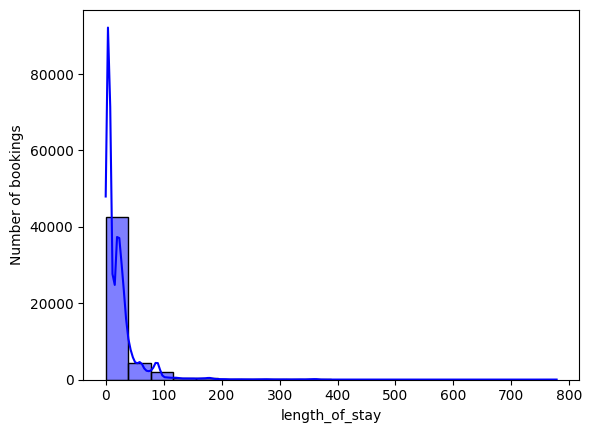

In [41]:
sns.histplot(df['length_of_stay'],bins=20,kde=True,color='blue')
plt.xlabel('length_of_stay')#this histogram displays how the majority of bookings are within 120 days of stay
plt.ylabel('Number of bookings')

Text(0, 0.5, 'Number of bookings')

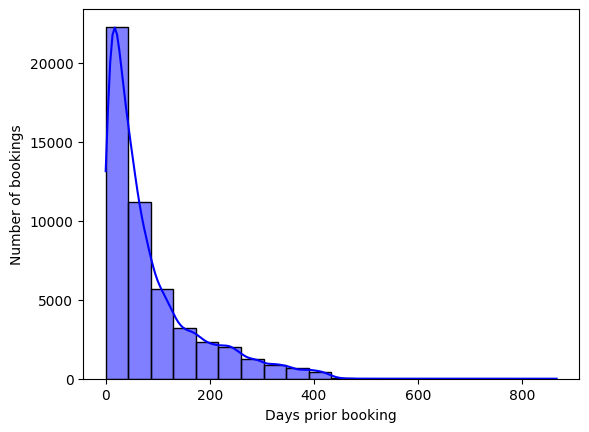

In [42]:
sns.histplot(df['purchase_lead'],bins=20,kde=True,color='blue')
plt.xlabel('Days prior booking')
plt.ylabel('Number of bookings')

In [43]:
extremes = outlier_detection(df['length_of_stay'])
#extremes

<ipython-input-33-56de8f675516>:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data, 50, interpolation = 'midpoint')
<ipython-input-33-56de8f675516>:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.perce

In [44]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [45]:
#bookings for the flight_date with the booking_complete labels
flight_days = pd.crosstab(columns = df.booking_complete, index = df.flight_day)

In [46]:
flight_days

booking_complete,0,1
flight_day,,
1,6898,1204
2,6544,1129
3,6422,1252
4,6302,1122
5,5778,983
6,4951,861
7,5627,927


In [47]:
flight_days['Total'] = flight_days.sum(axis=1)
#calculating the proportion of bookings for each day of the week
flight_days.loc[:,'Proportion'] = flight_days.apply(lambda r: 100 * r[1] / r.Total, axis=1)

In [48]:
flight_days #the proportion column indicates the % of the bookings that have been completed for that departure day of the week

booking_complete,0,1,Total,Proportion
flight_day,,,,
1,6898,1204,8102,14.860528
2,6544,1129,7673,14.713932
3,6422,1252,7674,16.314829
4,6302,1122,7424,15.113147
5,5778,983,6761,14.539269
6,4951,861,5812,14.814178
7,5627,927,6554,14.144034


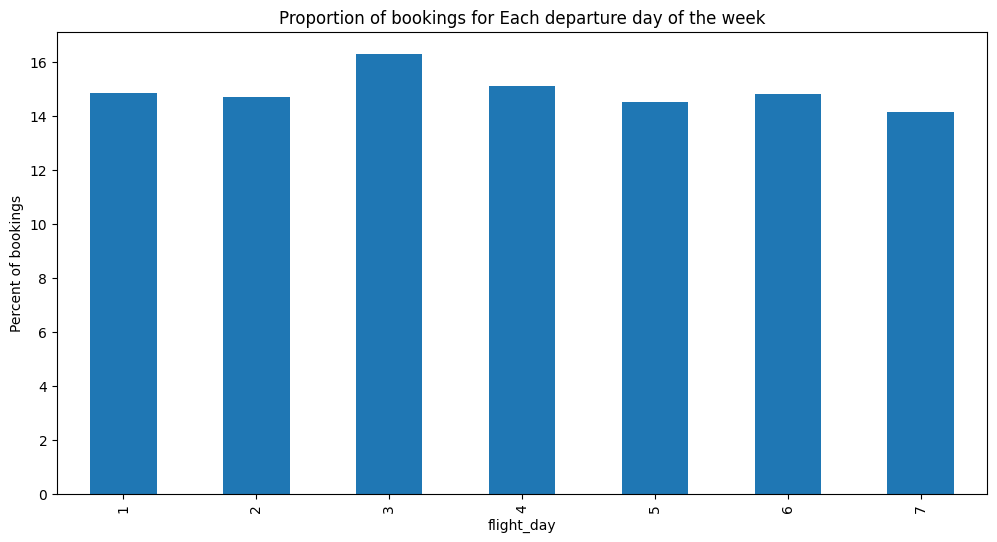

In [49]:
ax = flight_days.plot(kind='bar', y='Proportion', legend=None, figsize=(12,6),  title='Proportion of bookings for Each departure day of the week')
_ = ax.set_ylabel('Percent of bookings')

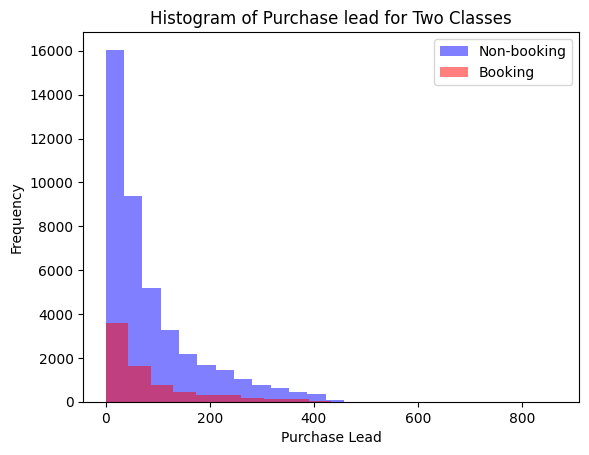

In [50]:
# Use a histogram to show teh distribution of changes
#fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,8),)
#df.plot(kind='hist', y='purchase_lead', bins=15, ax=ax1, grid=True,
              #title = 'Number of bookings initiated prior to trip')

class_0 = df.loc[df['booking_complete']==0]
class_1 = df.loc[df['booking_complete']==1]
# Create a histogram for Class A
plt.hist(class_0['purchase_lead'], bins=20, alpha=0.5, label='Non-booking', color='blue')

# Create a histogram for Class B
plt.hist(class_1['purchase_lead'], bins=20, alpha=0.5, label='Booking', color='red')

# Customize the plot
plt.xlabel('Purchase Lead')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase lead for Two Classes')
plt.legend()

# Show the plot
plt.show()

#ax.set_xlabel('Number of days', fontsize=14)
#ax.set_ylabel('Count', fontsize=14)

In [51]:
len(class_1.loc[class_1['purchase_lead']>200])

882

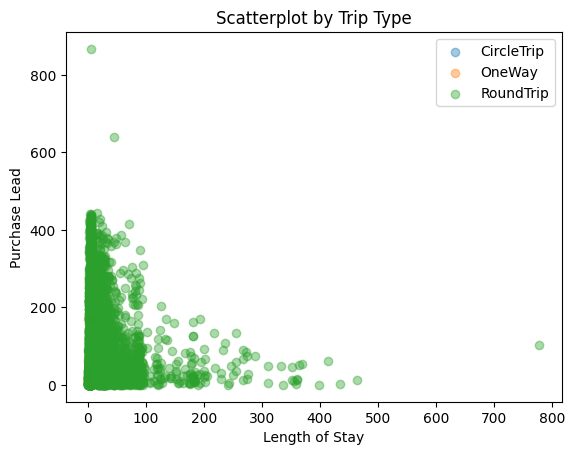

In [52]:
#to check the purchase lead in correlation to booking type
groups = class_1.groupby('trip_type')
for trip_type,group in groups:
  plt.scatter(group.length_of_stay, group.purchase_lead,label=trip_type, alpha = 0.4)

plt.xlabel('Length of Stay')
plt.ylabel('Purchase Lead')
plt.title('Scatterplot by Trip Type')
plt.legend()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [54]:
df.trip_type = df['trip_type'].astype('category')

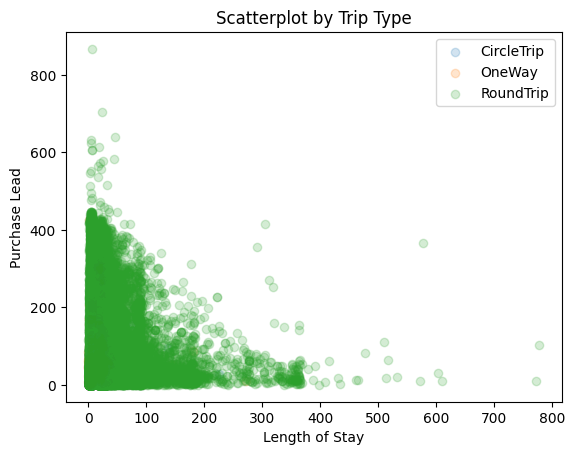

In [55]:
#to check the purchase lead in correlation to booking type
groups = df.groupby('trip_type')
for trip_type,group in groups:
  plt.scatter(group.length_of_stay, group.purchase_lead,label=trip_type, alpha = 0.2)

plt.xlabel('Length of Stay')
plt.ylabel('Purchase Lead')
plt.title('Scatterplot by Trip Type')
plt.legend()

#plt.figure(figsize=(8, 6))
#plt.scatter(df['length_of_stay'], df['purchase_lead'],label='trip_type')
#plt.legend()

In [56]:
oneway = len(df[df.trip_type =='OneWay'])
circle = len(df[df.trip_type =='CircleTrip'])
print(f'The number of One way bookings are {oneway} and circle trips are {circle}')


The number of One way bookings are 387 and circle trips are 116


In [57]:
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,TripType
0,2,19,7,6,5.52,0,RoundTrip
1,1,20,3,6,5.52,0,RoundTrip
2,2,22,17,3,5.52,0,RoundTrip
3,1,31,4,6,5.52,0,RoundTrip
4,2,22,15,3,5.52,0,RoundTrip
...,...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0,RoundTrip
49996,1,6,4,7,5.62,0,RoundTrip
49997,1,6,22,6,5.62,0,RoundTrip
49998,1,6,11,1,5.62,0,RoundTrip


In [58]:
df_2['TripType']= df_2['TripType'].astype('category')

In [59]:
df_2['TripType'] = df_2['TripType'].cat.rename_categories({'RoundTrip':0,'OneWay':1,'CircleTrip':2})
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,TripType
0,2,19,7,6,5.52,0,0
1,1,20,3,6,5.52,0,0
2,2,22,17,3,5.52,0,0
3,1,31,4,6,5.52,0,0
4,2,22,15,3,5.52,0,0
...,...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0,0
49996,1,6,4,7,5.62,0,0
49997,1,6,22,6,5.62,0,0
49998,1,6,11,1,5.62,0,0


In [60]:
df_2.TripType.unique()

[0, 2, 1]
Categories (3, int64): [2, 1, 0]

In [61]:
df_2['wants_preferred_seat'] = df['wants_preferred_seat']
df_2['wants_extra_baggage'] = df['wants_extra_baggage']
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   num_passengers        50000 non-null  int64   
 1   length_of_stay        50000 non-null  int64   
 2   flight_hour           50000 non-null  int64   
 3   flight_day            50000 non-null  category
 4   flight_duration       50000 non-null  float64 
 5   booking_complete      50000 non-null  int64   
 6   TripType              50000 non-null  category
 7   wants_preferred_seat  50000 non-null  int64   
 8   wants_extra_baggage   50000 non-null  int64   
dtypes: category(2), float64(1), int64(6)
memory usage: 2.8 MB


In [62]:
df_2['purchase_lead']=df['purchase_lead']

In [63]:
df_2

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,booking_complete,TripType,wants_preferred_seat,wants_extra_baggage,purchase_lead
0,2,19,7,6,5.52,0,0,0,1,262
1,1,20,3,6,5.52,0,0,0,0,112
2,2,22,17,3,5.52,0,0,1,1,243
3,1,31,4,6,5.52,0,0,0,0,96
4,2,22,15,3,5.52,0,0,0,1,68
...,...,...,...,...,...,...,...,...,...,...
49995,2,6,9,6,5.62,0,0,0,1,27
49996,1,6,4,7,5.62,0,0,0,0,111
49997,1,6,22,6,5.62,0,0,0,0,24
49998,1,6,11,1,5.62,0,0,0,1,15


## Section 3: Hypothesis testing (chi-squared)

1. Testing the influence of the flight days with the bookings
2. Testing the influence of purchase lead on bookings


In [64]:
cross_tab1 = pd.crosstab(index=df_2.booking_complete,columns = df_2.flight_day)
cross_tab1

flight_day,1,2,3,4,5,6,7
booking_complete,,,,,,,
0,6898,6544,6422,6302,5778,4951,5627
1,1204,1129,1252,1122,983,861,927


### Chi-squared test -1

In [65]:
import scipy.stats as stats
test_stat, p_value, dof, expected = stats.chi2_contingency(
    cross_tab1, correction=False)

In [66]:
print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 6 degrees of freedom
The chi-squared test statistic is 16.11
The p-value is 1.319 %


In [67]:
p_value

0.013185192051000815

In [68]:
cross_tab1 - expected.round(1)

flight_day,1,2,3,4,5,6,7
booking_complete,,,,,,,
0,7.7,18.6,-104.3,-11.7,28.2,8.2,53.2
1,-7.7,-18.6,104.3,11.7,-28.2,-8.2,-53.2


In [69]:
cross_tab2 = pd.crosstab(index=df_2.purchase_lead,columns = df_2.booking_complete)
test_stat2, p_value2, dof2, expected2 = stats.chi2_contingency(
    cross_tab2, correction=False)

In [70]:
print('There are %d degrees of freedom' % dof2)
print('The chi-squared test statistic is %4.2f' % test_stat2)
print('The p-value is %4.3f %%' % (100 * p_value2))

There are 469 degrees of freedom
The chi-squared test statistic is 608.01
The p-value is 0.001 %


In [71]:
p_value2

1.4828724060410088e-05

In [72]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
from imblearn.over_sampling import RandomOverSampler
#oversampler = RandomOverSampler(random_state=42)
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [74]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=8, random_state=0)
#clf.fit(X_train_resampled, y_train_resampled)

## Section 4: Predictive analysis

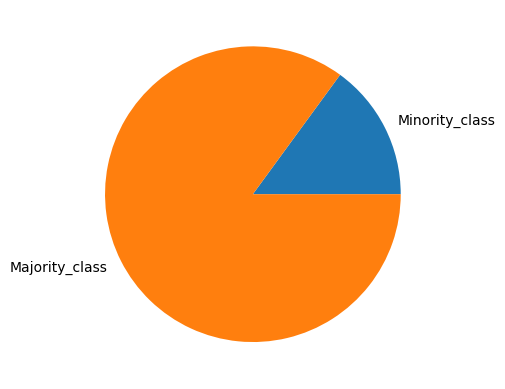

In [75]:
class_division = [df_2[df_2.booking_complete==1].shape[0],df_2[df_2.booking_complete==0].shape[0]]
my_labels = ['Minority_class','Majority_class']
plt.pie(class_division,labels=my_labels)
plt.show()

In [76]:
print('proportion of minority class:' + str(round(df_2[df_2.booking_complete==1].shape[0]/df_2.shape[0] * 100,2)) + '%')

proportion of minority class:14.96%


In [77]:
X= df_2.drop(columns = 'booking_complete')
y= df_2.booking_complete

In [78]:
X.columns

Index(['num_passengers', 'length_of_stay', 'flight_hour', 'flight_day',
       'flight_duration', 'TripType', 'wants_preferred_seat',
       'wants_extra_baggage', 'purchase_lead'],
      dtype='object')

In [79]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=34, stratify=y)

In [80]:
print('proportion of minority class:' + str(round(y_train.sum()/len(y_train) * 100,2)) + '%')

proportion of minority class:14.96%


In [81]:
print('proportion of minority class in test:' + str(round(y_test.sum()/len(y_test) * 100,2)) + '%')

proportion of minority class in test:14.95%


In [82]:
#XGBoost
train_data = pd.concat([X_train,y_train],axis=1)

In [106]:
no_booking = train_data[train_data.booking_complete==0]
booking_one = train_data[train_data.booking_complete==1]

oversampler = RandomOverSampler(sampling_strategy=1, random_state=42)


X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [107]:
y_resampled.value_counts()

0    29765
1    29765
Name: booking_complete, dtype: int64

In [108]:
y_train.value_counts()

0    29765
1     5235
Name: booking_complete, dtype: int64

In [86]:
from xgboost import XGBClassifier


In [109]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59530 entries, 0 to 59529
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   num_passengers        59530 non-null  int64   
 1   length_of_stay        59530 non-null  int64   
 2   flight_hour           59530 non-null  int64   
 3   flight_day            59530 non-null  category
 4   flight_duration       59530 non-null  float64 
 5   TripType              59530 non-null  category
 6   wants_preferred_seat  59530 non-null  int64   
 7   wants_extra_baggage   59530 non-null  int64   
 8   purchase_lead         59530 non-null  int64   
dtypes: category(2), float64(1), int64(6)
memory usage: 3.3 MB


In [110]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [111]:
train_over = rf.predict(X_resampled)
test_over = rf.predict(X_test)

In [112]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_over)

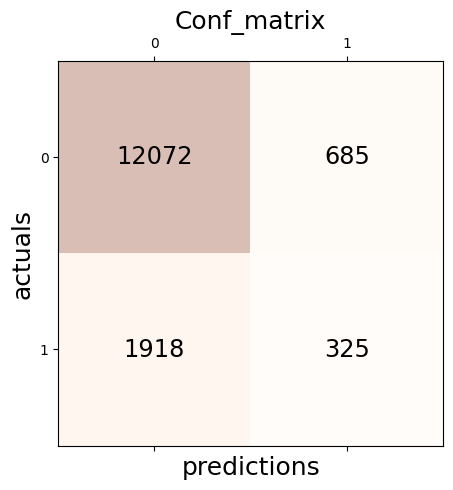

In [113]:
fig,ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j], va='center',ha='center',size='xx-large')

plt.xlabel('predictions',fontsize=18)
plt.ylabel('actuals',fontsize=18)
plt.title('Conf_matrix',fontsize=18)
plt.show()

In [114]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [115]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [116]:
precision = round(precision_score(y_test,test_over),4)
recall = round(recall_score(y_test,test_over),4)
F1 = round(f1_score(y_test,test_over),4)



In [117]:
print(precision, recall, F1)

0.3218 0.1449 0.1998


# TO COMPARE WITH ORIGINAL DATA

In [118]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
test = rf.predict(X_test)


In [120]:
conf_matrix2 = confusion_matrix(y_true=y_test, y_pred=test)

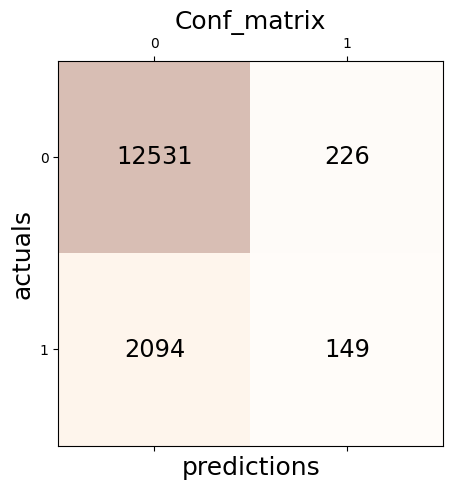

In [121]:
fig,ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix2.shape[0]):
  for j in range(conf_matrix2.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix2[i,j], va='center',ha='center',size='xx-large')

plt.xlabel('predictions',fontsize=18)
plt.ylabel('actuals',fontsize=18)
plt.title('Conf_matrix',fontsize=18)
plt.show()

In [122]:
precision_original = round(precision_score(y_test,test),4)
recall_original= round(recall_score(y_test,test),4)
F1_original = round(f1_score(y_test,test),4)

In [123]:
print(precision_original, recall_original, F1_original)

0.3973 0.0664 0.1138


In [124]:
classification_rep = classification_report(y_test, test_over)


In [125]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12757
           1       0.32      0.14      0.20      2243

    accuracy                           0.83     15000
   macro avg       0.59      0.55      0.55     15000
weighted avg       0.78      0.83      0.80     15000



In [126]:
classification_original = classification_report(y_test,test)
print(classification_original)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12757
           1       0.40      0.07      0.11      2243

    accuracy                           0.85     15000
   macro avg       0.63      0.52      0.51     15000
weighted avg       0.79      0.85      0.80     15000



# Iterating over different ratios

In [127]:

# Define a range of sampling strategies to iterate over
sampling_strategies = {'minority', 'auto', 'not majority', 'all', 'not minority'}  # Adjust the range as needed

best_f1_score = 0.0  # Initialize a variable to track the best F1-score
best_strategy = None

for strategy in sampling_strategies:
    # Create and fit the RandomOverSampler with the current strategy
    oversampler = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_r, y_r = oversampler.fit_resample(X_train, y_train)

    # Train your model on the resampled data (replace this with your model training code)
    rf.fit(X_r, y_r)

    # Make predictions on your test data (replace this with your prediction code)
    y_pred = rf.predict(X_test)

    # Calculate the F1-score for the current strategy
    current_f1_score = f1_score(y_test, y_pred)

    # Check if the current F1-score is the best so far
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_strategy = strategy

print("Best Sampling Strategy:", best_strategy)
print("Best F1-Score:", best_f1_score)


Best Sampling Strategy: not majority
Best F1-Score: 0.20610922554767047


In [128]:
final_oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_final,y_final = final_oversampler.fit_resample(X_train,y_train)


In [129]:
rf.fit(X_final,y_final)
y_pred = rf.predict(X_test)

In [130]:
conf_matrix3 = confusion_matrix(y_true=y_test, y_pred=y_pred)

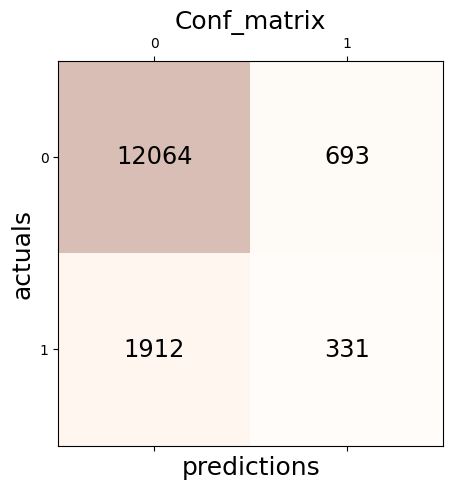

In [132]:
fig,ax = plt.subplots(figsize=(5,5))
ax.matshow(conf_matrix3, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix3.shape[0]):
  for j in range(conf_matrix3.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix3[i,j], va='center',ha='center',size='xx-large')

plt.xlabel('predictions',fontsize=18)
plt.ylabel('actuals',fontsize=18)
plt.title('Conf_matrix',fontsize=18)
plt.show()

In [133]:
classification_rep3 = classification_report(y_test, y_pred)
print(classification_rep3)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12757
           1       0.32      0.15      0.20      2243

    accuracy                           0.83     15000
   macro avg       0.59      0.55      0.55     15000
weighted avg       0.78      0.83      0.80     15000



In [134]:
X_test['predictions']= y_pred

In [135]:
X_test

,num_passengers,length_of_stay,flight_hour,flight_day,flight_duration,TripType,wants_preferred_seat,wants_extra_baggage,purchase_lead,predictions
18273,4,22,5,4,5.62,0,1,1,147,0
34179,1,4,11,2,5.62,0,0,1,2,0
4123,4,20,9,1,8.83,0,0,1,296,0
15683,2,37,10,2,6.33,0,0,0,13,0
14010,3,81,6,6,6.62,0,0,1,107,0
...,...,...,...,...,...,...,...,...,...,...
45050,1,6,15,1,5.07,0,1,1,12,1
19272,1,24,13,5,8.83,0,0,1,90,1
27804,1,3,10,6,7.57,0,0,1,40,0
31974,2,4,2,1,8.83,0,0,0,85,0


In [136]:
predictions_copy = X_test.copy()

In [137]:
result = pd.merge(predictions_copy, df, left_index=True, right_index=True)


In [138]:
result

,num_passengers_x,length_of_stay_x,flight_hour_x,flight_day_x,flight_duration_x,TripType,wants_preferred_seat_x,wants_extra_baggage_x,purchase_lead_x,predictions,...,length_of_stay_y,flight_hour_y,flight_day_y,route,booking_origin,wants_extra_baggage_y,wants_preferred_seat_y,wants_in_flight_meals,flight_duration_y,booking_complete
18273,4,22,5,4,5.62,0,1,1,147,0,...,22,5,4,MAAPER,Australia,1,1,1,5.62,0
34179,1,4,11,2,5.62,0,0,1,2,0,...,4,11,2,PENPER,Australia,1,0,1,5.62,0
4123,4,20,9,1,8.83,0,0,1,296,0,...,20,9,1,CGKMEL,Australia,1,0,1,8.83,0
15683,2,37,10,2,6.33,0,0,0,13,0,...,37,10,2,JHBPUS,South Korea,0,0,0,6.33,0
14010,3,81,6,6,6.62,0,0,1,107,0,...,81,6,6,ICNPEN,South Korea,1,0,0,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45050,1,6,15,1,5.07,0,1,1,12,1,...,6,15,1,DPSHGH,China,1,1,1,5.07,1
19272,1,24,13,5,8.83,0,0,1,90,1,...,24,13,5,MELPNH,Australia,1,0,0,8.83,0
27804,1,3,10,6,7.57,0,0,1,40,0,...,3,10,6,HNDPEN,Malaysia,1,0,0,7.57,1
31974,2,4,2,1,8.83,0,0,0,85,0,...,4,2,1,HKTMEL,Australia,0,0,0,8.83,0


In [139]:
result.columns

Index(['num_passengers_x', 'length_of_stay_x', 'flight_hour_x', 'flight_day_x',
       'flight_duration_x', 'TripType', 'wants_preferred_seat_x',
       'wants_extra_baggage_x', 'purchase_lead_x', 'predictions',
       'num_passengers_y', 'sales_channel', 'trip_type', 'purchase_lead_y',
       'length_of_stay_y', 'flight_hour_y', 'flight_day_y', 'route',
       'booking_origin', 'wants_extra_baggage_y', 'wants_preferred_seat_y',
       'wants_in_flight_meals', 'flight_duration_y', 'booking_complete'],
      dtype='object')

In [140]:
result.drop(columns = ['num_passengers_y', 'TripType','purchase_lead_y',
       'length_of_stay_y', 'flight_hour_y', 'flight_day_y','wants_extra_baggage_y', 'wants_preferred_seat_y','flight_duration_y'],inplace=True)

In [141]:
result

,num_passengers_x,length_of_stay_x,flight_hour_x,flight_day_x,flight_duration_x,wants_preferred_seat_x,wants_extra_baggage_x,purchase_lead_x,predictions,sales_channel,trip_type,route,booking_origin,wants_in_flight_meals,booking_complete
18273,4,22,5,4,5.62,1,1,147,0,Internet,RoundTrip,MAAPER,Australia,1,0
34179,1,4,11,2,5.62,0,1,2,0,Internet,RoundTrip,PENPER,Australia,1,0
4123,4,20,9,1,8.83,0,1,296,0,Internet,RoundTrip,CGKMEL,Australia,1,0
15683,2,37,10,2,6.33,0,0,13,0,Internet,RoundTrip,JHBPUS,South Korea,0,0
14010,3,81,6,6,6.62,0,1,107,0,Internet,RoundTrip,ICNPEN,South Korea,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45050,1,6,15,1,5.07,1,1,12,1,Internet,RoundTrip,DPSHGH,China,1,1
19272,1,24,13,5,8.83,0,1,90,1,Internet,RoundTrip,MELPNH,Australia,0,0
27804,1,3,10,6,7.57,0,1,40,0,Internet,RoundTrip,HNDPEN,Malaysia,0,1
31974,2,4,2,1,8.83,0,0,85,0,Internet,RoundTrip,HKTMEL,Australia,0,0


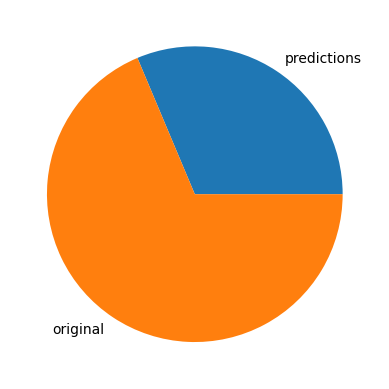

In [143]:
pred_division = [result[result.predictions==1].shape[0],result[result.booking_complete==1].shape[0]]
my_labels = ['predictions','original']
plt.pie(pred_division,labels=my_labels)
plt.show()

# Feature importance

In [144]:
feat_importance= rf.feature_importances_

In [145]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feat_importance})


In [146]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)


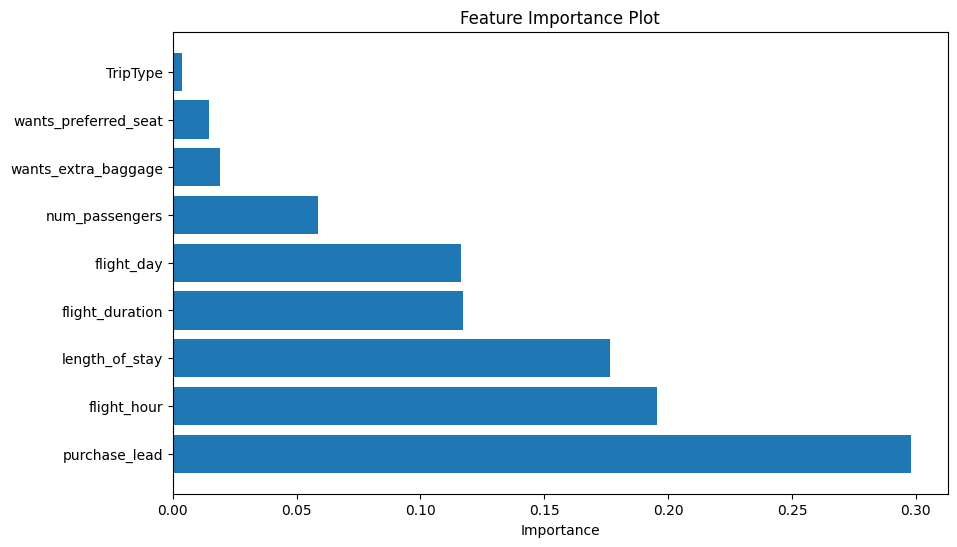

In [147]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.show()